In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [18]:
dataset = pd.read_csv("fraudTest.csv")


In [19]:
type(dataset)

pandas.core.frame.DataFrame

In [20]:
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [21]:
pd.value_counts(dataset['is_fraud'])

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [22]:
dataset.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [24]:
dataset.drop_duplicates(inplace=True)


In [25]:
dataset.shape

(555719, 23)

In [26]:
dataset.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178627e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309920e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800000e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.520000e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.640000e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.990000e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [27]:
dataset

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,31-12-2020 23:59,3.060000e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,13-02-1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,31-12-2020 23:59,3.560000e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,27-12-1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,31-12-2020 23:59,6.010000e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,29-11-1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,31-12-2020 23:59,4.080000e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,15-12-1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
print(label_encoder)

LabelEncoder()


In [54]:
dataset["lat"]=label_encoder.fit_transform(dataset["lat"])
dataset["cc_num"]=label_encoder.fit_transform(dataset["cc_num"])
dataset["trans_date_trans_time"]=label_encoder.fit_transform(dataset["trans_date_trans_time"])
dataset["merchant"]=label_encoder.fit_transform(dataset["merchant"])
dataset["category"]=label_encoder.fit_transform(dataset["category"])
dataset["amt"]=label_encoder.fit_transform(dataset["amt"])
dataset["first"]=label_encoder.fit_transform(dataset["first"])
dataset["last"]=label_encoder.fit_transform(dataset["last"])
dataset["gender"]=label_encoder.fit_transform(dataset["gender"])
dataset["street"]=label_encoder.fit_transform(dataset["street"])
dataset["city"]=label_encoder.fit_transform(dataset["city"])
dataset["state"]=label_encoder.fit_transform(dataset["state"])
dataset["zip"]=label_encoder.fit_transform(dataset["zip"])
dataset["long"]=label_encoder.fit_transform(dataset["long"])
dataset["job"]=label_encoder.fit_transform(dataset["job"])
dataset["dob"]=label_encoder.fit_transform(dataset["dob"])
dataset["trans_num"]=label_encoder.fit_transform(dataset["trans_num"])
dataset["merch_lat"]=label_encoder.fit_transform(dataset["merch_lat"])
dataset["merch_long"]=label_encoder.fit_transform(dataset["merch_long"])

In [55]:
dataset.dtypes

Unnamed: 0               int64
trans_date_trans_time    int64
cc_num                   int64
merchant                 int64
category                 int64
amt                      int64
first                    int64
last                     int64
gender                   int64
street                   int64
city                     int64
state                    int64
zip                      int64
lat                      int64
long                     int64
city_pop                 int64
job                      int64
dob                      int64
trans_num                int64
unix_time                int64
merch_lat                int64
merch_long               int64
is_fraud                 int64
dtype: object

<Axes: ylabel='count'>

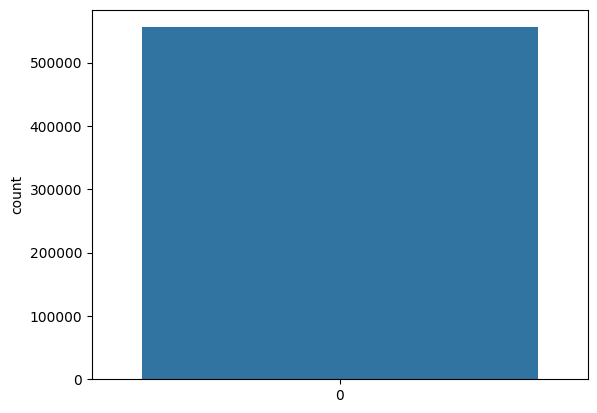

In [56]:
sns.countplot(dataset['is_fraud'])

In [57]:
len(dataset[dataset['is_fraud']==0])

553574

In [58]:
len(dataset[dataset['is_fraud']==1])

2145

In [59]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[ : , -1].values

In [60]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_res , y_res=ros.fit_resample(X,y)

In [61]:
X.shape

(555719, 22)

In [62]:
X_res.shape

(1107148, 22)

In [63]:
X_test

array([[357074, '06-11-2020 19:09', 38900000000000.0, ..., 1383764980,
        42.263597, -111.815526],
       [91774, '23-07-2020 00:19', 4960000000000000.0, ..., 1374538746,
        40.813117, -75.968042],
       [194683, '28-08-2020 21:37', 30100000000000.0, ..., 1377725855,
        36.403257, -85.062416],
       ...,
       [546657, '29-12-2020 15:29', 213000000000000.0, ..., 1388330967,
        46.020813, -84.864591],
       [135787, '07-08-2020 23:48', 6600000000000000.0, ..., 1375919306,
        40.111432, -75.304048],
       [327216, '24-10-2020 20:25', 4600000000000000.0, ..., 1382646322,
        38.541845, -97.111516]], dtype=object)

In [64]:
from collections import Counter
print(Counter(y))
print(Counter(y_res))

Counter({0: 553574, 1: 2145})
Counter({0: 553574, 1: 553574})


In [65]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train,y_test=train_test_split(X_res,y_res,test_size=0.25 , random_state=42)

In [66]:
X_train.shape

(830361, 22)

In [67]:
y_train.shape

(830361,)

In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=541,random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=541, random_state=0)

In [69]:
y_pred=classifier.predict(X_test)

In [70]:
n_errors=(y_pred!=y_test).sum()

In [71]:
n_errors

30

In [80]:
y_test.shape

(276787,)

In [76]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm= confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[138287     30]
 [     0 138470]]
0.999891613406699


In [78]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [79]:
y_pred=classifier.predict(X_test)

In [82]:
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 0]]


In [83]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[76534 61783]
 [60517 77953]]


In [84]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5581439879763139


In [85]:
from sklearn.tree import DecisionTreeClassifier
Dt=DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
y_pred=classifier.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[76534 61783]
 [60517 77953]]


In [88]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5581439879763139
